In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("C:/Users/Asus/Downloads/M4T5_helper_text/New folder/Transformed_Housing_Data2(1).csv")

In [11]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
data["mean_sales"] = data["Sale_Price"].mean()
data["mean_sales"].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

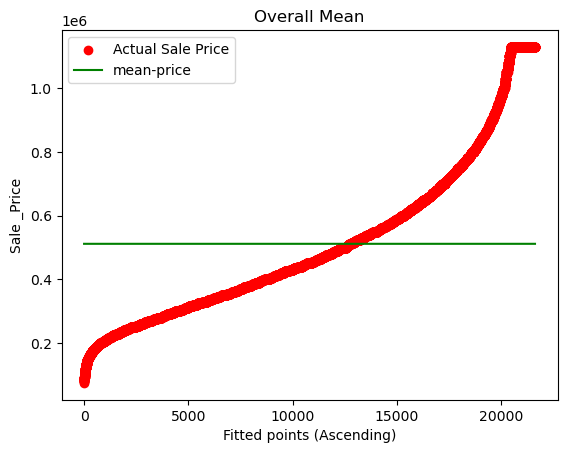

In [13]:
plt.figure(dpi =100)
k = range(0,len(data))
plt.scatter(k,data["Sale_Price"].sort_values(), color ="red", label = 'Actual Sale Price')
plt.plot(k,data['mean_sales'].sort_values(), color="green",label = 'mean-price')
plt.xlabel("Fitted points (Ascending)")
plt.ylabel("Sale _Price")
plt.title('Overall Mean')
plt.legend()

# Improve in linear regression model

In [14]:
grades_mean = data.pivot_table(values = "Sale_Price", columns = 'Overall Grade', aggfunc = np.mean)
grades_mean

C:\Users\Asus\AppData\Local\Temp\ipykernel_13808\7196017.py:1: FutureWarning: The provided callable <function mean at 0x000002DF962914E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grades_mean = data.pivot_table(values = "Sale_Price", columns = 'Overall Grade', aggfunc = np.mean)


Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [15]:
data['grades_mean'] = 0

for i in grades_mean.columns:
    data["grades_mean"][data["Overall Grade"]==i] = grades_mean[i][0]

data['grades_mean'].head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13808\3444519681.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data["grades_mean"][data["Overall Grade"]==i] = grades_mean[i][0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_13808\3444519681.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["grades_mean"][data["Overall Grade"]==i] = grades_mean[i][0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_13808\3444519681.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by p

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grades_mean, dtype: float64

In [16]:
gradewise_list = []
for i in range(1,11):
    k = data["Sale_Price"][data["Overall Grade"]==i]
    gradewise_list.append(k)

In [17]:
classwise_list = []
for i in range(1,11):
    k = data["Sale_Price"][data["Overall Grade"]==i]
    classwise_list.append(k)

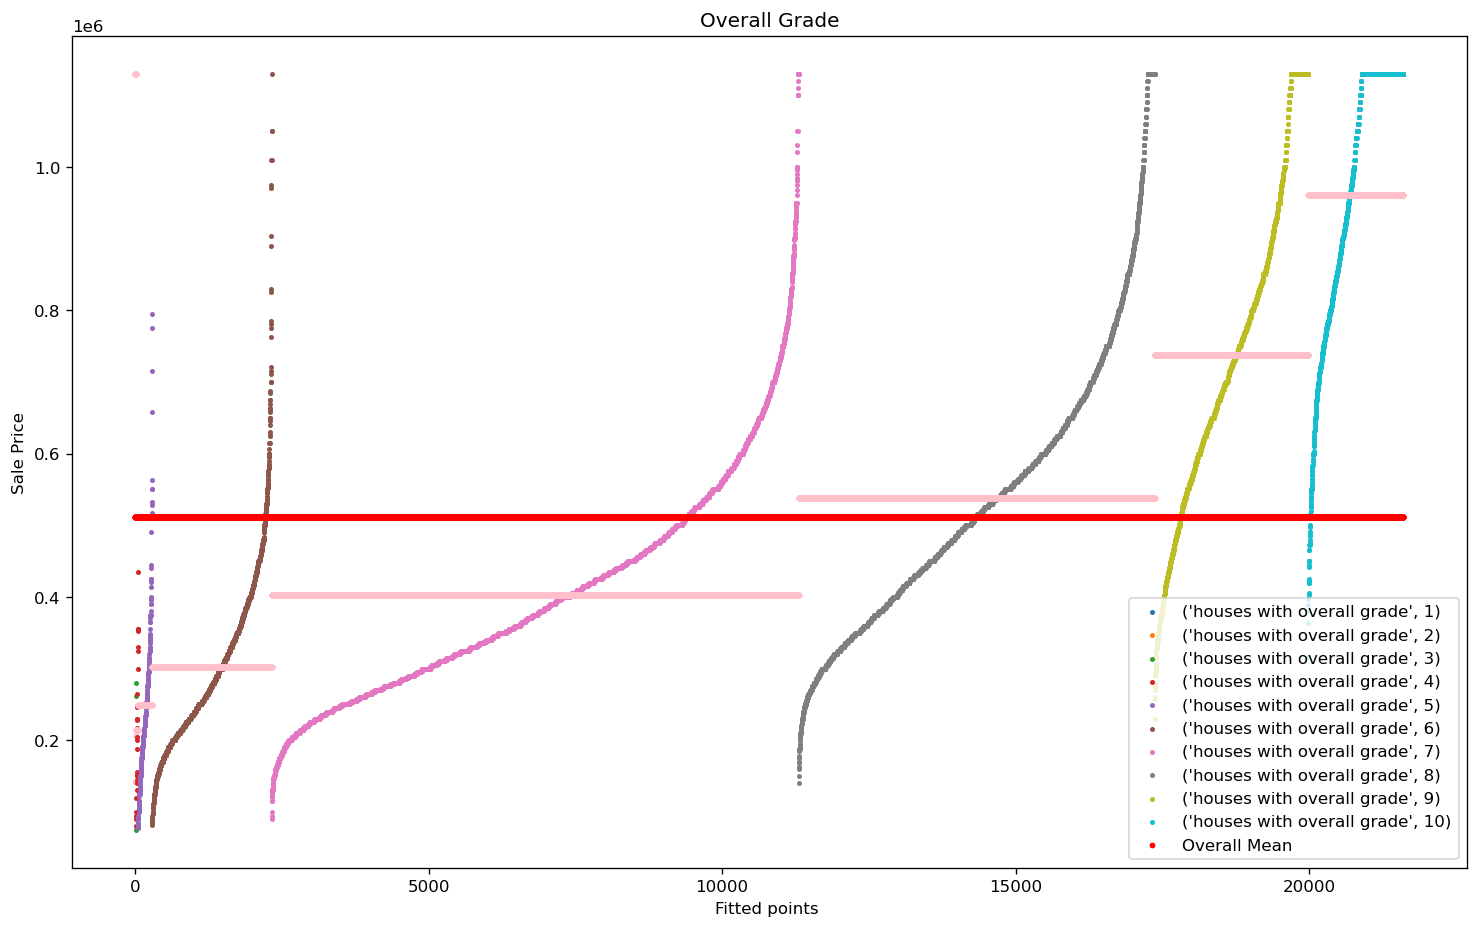

In [18]:
plt.figure( dpi = 120,figsize = (15,9))

z = 0
for i in range(1,11):
    points = [k for k in range(z, z+ len(classwise_list[i-1]))]
    plt.scatter(points,
    classwise_list[i-1].sort_values(),
    label = ('houses with overall grade',i),s=4)

    plt.scatter(points,
    [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
    s=6,color = 'pink')
    z = max(points) + 1

plt.scatter([q for q in range(0,z)],
            data['mean_sales'],
            color = 'red',
            label = 'Overall Mean',
            s = 6)

plt.xlabel("Fitted points ")
plt.ylabel("Sale Price")
plt.title('Overall Grade')
plt.legend(loc=4)


# Residual Plot

In [19]:
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference = data['grades_mean'] - data['Sale_Price']

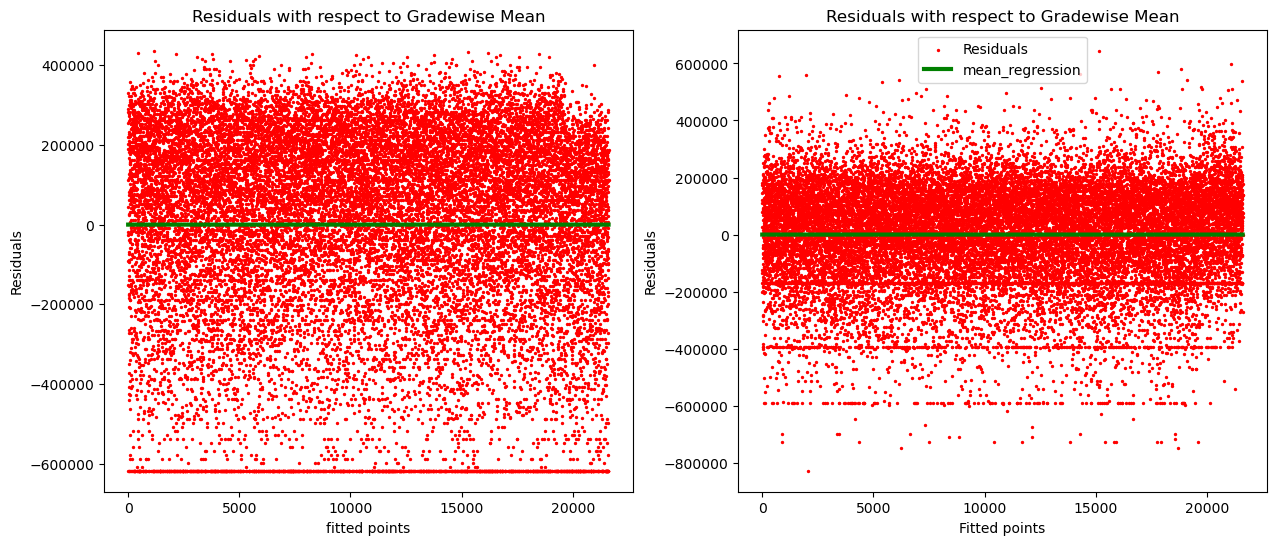

In [20]:
k = range(0, len(data))
l = [0 for i in range(len(data))]

plt.figure( figsize = (15,6), dpi = 100)

plt.subplot(1,2,1)
plt.scatter(k, mean_difference, color="red", label = "Residuals", s =2)
plt.plot(k , l,color="green", label = 'mean_difference', linewidth = 3)
plt.xlabel("fitted points")
plt.ylabel("Residuals")
plt.title("Residuals with respect to Gradewise Mean")


plt.subplot(1,2,2)
plt.scatter(k, grade_mean_difference, color ='red', label = 'Residuals', s= 2)
plt.plot(k,l, color = 'green', label='mean_regression', linewidth = 3)
plt.xlabel("Fitted points")
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals with respect to Gradewise Mean")


plt.legend()

# Model Evaluation

## MAE

In [21]:
cost = sum(mean_difference)/len(data)
print(round(cost,7))

0.0


In [22]:
Y = data['Sale_Price']
Y_hat1 = data['mean_sales']
Y_hat2 = data['grades_mean']
n = len(data)

len(Y), len(Y_hat1), len(Y_hat2),n

(21609, 21609, 21609, 21609)

In [23]:
cost_mean = sum(abs(Y_hat1 - Y))/n
cost_mean

199168.78146839526

In [24]:
cost_grade_mean = sum(abs(Y_hat2 - Y))/n
cost_grade_mean

137081.70298203363

In [25]:
from sklearn.metrics import mean_absolute_error
cost_grade_mean = mean_absolute_error(Y_hat2, Y)
cost_grade_mean

137081.7029820291

# MSE

In [26]:
from sklearn.metrics import mean_squared_error as mse
cost_mean = mse(Y_hat1, Y)
cost_grade_mean = mse(Y_hat2, Y)
cost_mean, cost_grade_mean

(62528116847.799576, 30804835720.342426)

# RMSE

In [27]:
from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(Y_hat1, Y)**0.5
cost_grade_mean = mean_squared_error(Y_hat2, Y)**0.5
cost_mean, cost_grade_mean

(250056.2273725643, 175513.06424406826)

# R^2

In [28]:
Y = data['Sale_Price']
Y_bar = data['mean_sales']
Y_hat = data['grades_mean']
n = len(data)

len(Y), len(Y_bar), len(Y_hat),n

(21609, 21609, 21609, 21609)

In [29]:
mse_mean = mean_squared_error(Y_bar,Y)
mse_mean

62528116847.799576

In [30]:
mse_model = mean_squared_error(Y_hat,Y)
mse_model

30804835720.342426

In [31]:
R2 = 1 - (mse_model/mse_mean)
R2

0.5073442592981836

# Linear Regression

In [32]:
sale_price = data["Sale_Price"].head(30)
flat_area = data["Flat Area (in Sqft)"].head(30)
sample_data = pd.DataFrame({'sale_price' : sale_price,'flat_area' : flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

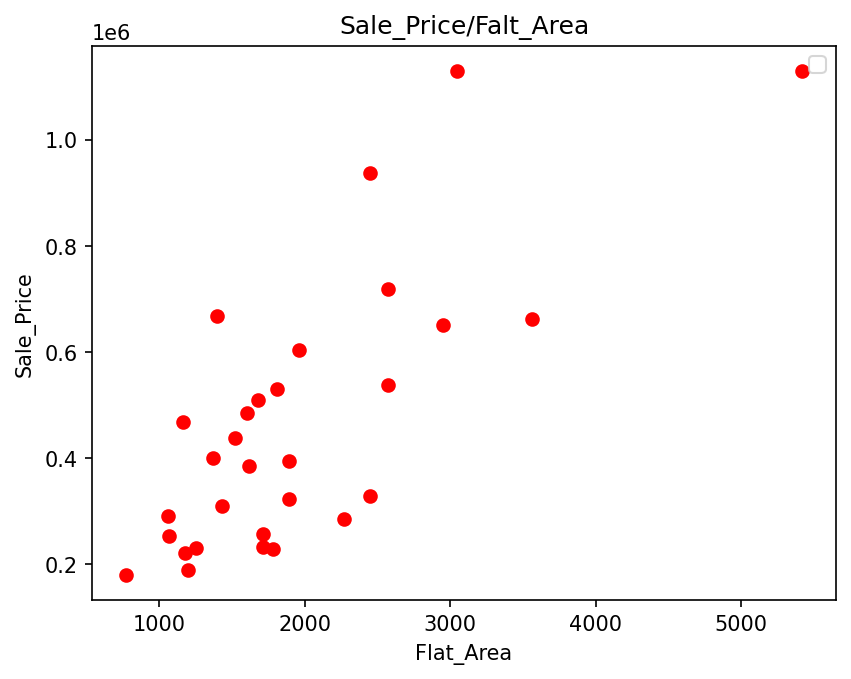

In [33]:
plt.figure(dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price , color="red")
plt.xlabel("Flat_Area")
plt.ylabel("Sale_Price")
plt.title("Sale_Price/Falt_Area")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

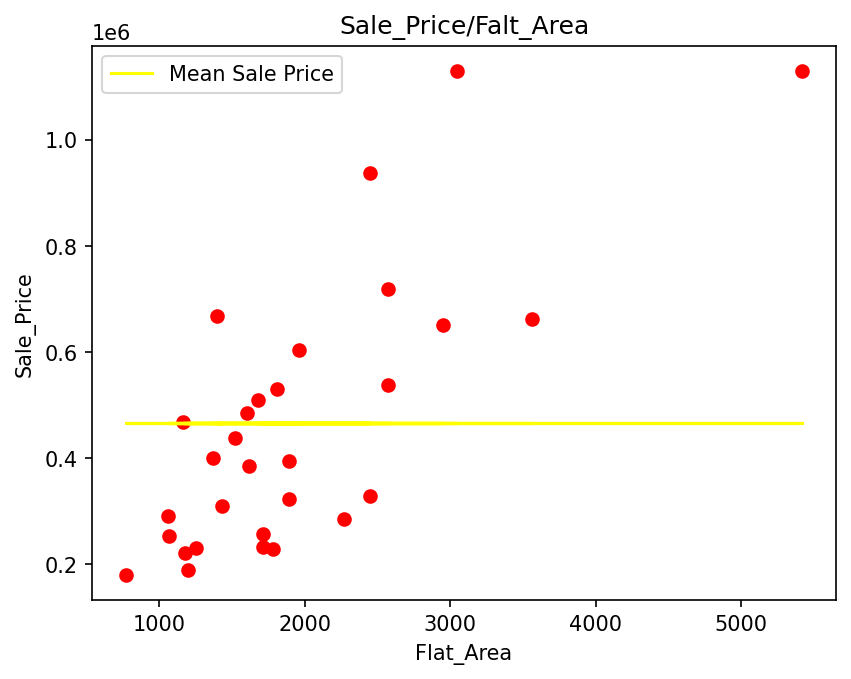

In [34]:
sample_data["mean_sale_price"] = sample_data.sale_price.mean()

plt.figure(dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price , color="red")
plt.plot(sample_data.flat_area, sample_data.mean_sale_price , color="yellow", label ="Mean Sale Price")
plt.xlabel("Flat_Area")
plt.ylabel("Sale_Price")
plt.title("Sale_Price/Falt_Area")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

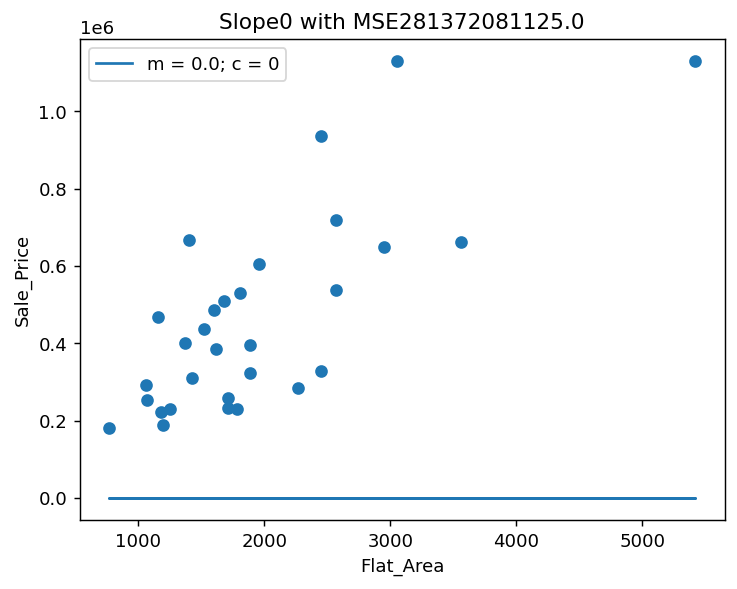

In [35]:
m = 0
c = 0

line=[]

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)

plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price )
plt.plot(sample_data.flat_area, line , label = "m = 0.0; c = 0")
plt.xlabel("Flat_Area")
plt.ylabel("Sale_Price")
plt.legend()
MSE = mse(sample_data.sale_price,line)
plt.title("Slope" + str(m)+" with MSE" + str(MSE))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

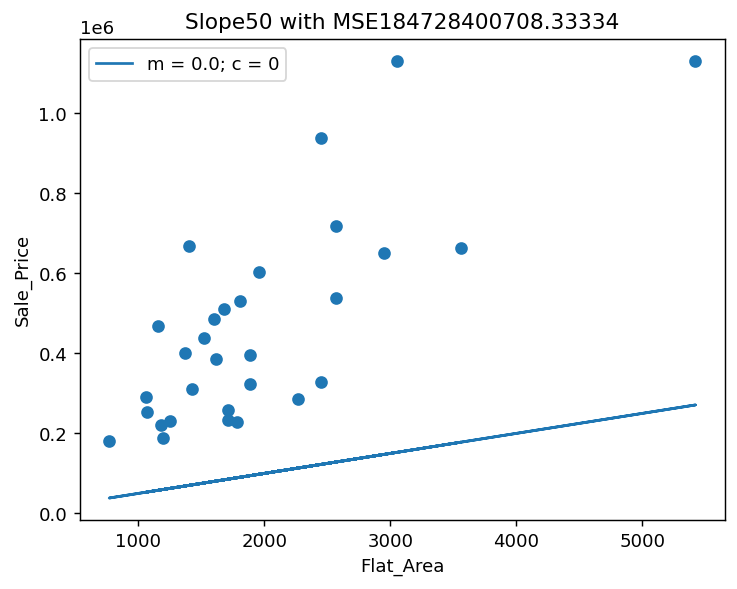

In [36]:
m = 50
c = 0

line=[]

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)

plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price )
plt.plot(sample_data.flat_area, line , label = "m = 0.0; c = 0")
plt.xlabel("Flat_Area")
plt.ylabel("Sale_Price")
plt.legend()
MSE = mse(sample_data.sale_price,line)
plt.title("Slope" + str(m)+" with MSE" + str(MSE))
plt.show

In [37]:
def slope_Error(slope,intercept,sample_data):
    sale=[]
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i]* slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [38]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error(slope = i , intercept = 10834,sample_data = sample_data)
    Cost.append(cost)

In [39]:
# Arranging in DataFrame

Cost_table = pd.DataFrame({
    'slope':slope,
    'Cost':Cost})

Cost_table.tail()

,slope,Cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


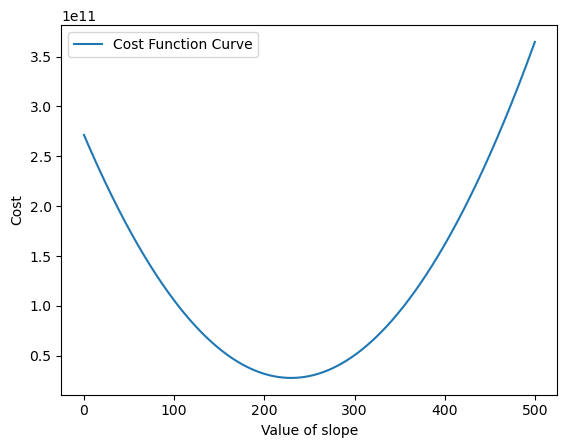

In [40]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel("Cost")
plt.legend()

In [41]:
def intercept_Error(slope,intercept,sample_data):
    sale=[]
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i]* slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [42]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in slope:
    cost = intercept_Error(slope = 229.7 , intercept = i,sample_data = sample_data)
    Cost.append(cost)

In [44]:
# # Arranging in DataFrame


# Cost_table = pd.DataFrame({
#     'intercept': intercept,
#     'Cost':Cost})

# Cost_table.head()

In [47]:
# # plotting the cost values corresponding to every value of Beta
# plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
# plt.xlabel('Value of slope')
# plt.ylabel("Cost")
# plt.legend()

In [48]:
new_slope = Cost_table["slope"][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

229.7

In [50]:
# new_intercept = Cost_table["intercept"][Cost_table['Cost'] == Cost_table['Cost'].min()].values
# new_intercept[0]

# Gradient Descent Algorithm

In [51]:
def param_init(Y):
    '''
    Y = target variable
    returns initialized values of m and c
    '''
    m = 0.1
    c = Y.mean()
    return m,c

In [52]:
def generate_predictions(m,c,X):
    '''
    X = independent variable
    returns prediction generated by line with parameters m,c
    '''
    prediction = []
    for x in X:
        pred = (m*x) + c
        prediction.append(pred)
    return prediction    

In [53]:
def compute_cost(prediction, Y):
    '''
    returns the mean_squared_error between prediction and Y
    '''
    cost = np.sum(((prediction - Y)**2)/len(Y))
    return cost

In [54]:
def gradients(prediction,Y,X):
    '''
    Returns Gradients corresponding to m and c
    '''
    n = len(Y)
    Gm = 2/n * np.sum((prediction - Y) * X)
    Gc = 2/n * np.sum((prediction - Y))
    return Gm,Gc

In [55]:
def param_update(m_old, c_old, Gm_old,Gc_old, alpha):
    '''
    Update and return the new values of m and c
    '''
    m_new = m_old - alpha * Gm_old
    c_new = c_old - alpha * Gc_old
    return m_new , c_new

In [56]:
def result(m,c,X,Y,cost,prediction , i):
    '''
    Print and plot the final result obtained from gradient Descent
    '''
    # IF the Gradient Descent converged to the optimum value before max_iter
    if i < max_iter - 1:
        print("**** Gradient Descent has converged at iteration{} ****".format(i))
    else:
        print("**** Result after", max_iter , 'Iterations is: ****')

    # plotting the final result
    plt.figure(figsize = (14,7),dpi = 120)
    plt.scatter(X,Y,color = 'red', label = "data points")
    label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
    plt.plot(X, prediction , color = 'green',label = label)
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.title('final regression line')
    plt.legend()

After Iteration 0 :m = 0.11316346413633305 ;c =  1.1849780416165836e-16  Cost =  0.85836535863667
After Iteration 20 :m = 0.3275595607435688 ;c =  1.240489192847842e-16  Cost =  0.6182472245590185
After Iteration 40 :m = 0.4706921039517346 ;c =  1.3248661427193537e-16  Cost =  0.5112264752046607
After Iteration 60 :m = 0.5662485308150865 ;c =  1.415904430738617e-16  Cost =  0.46352728398628984
After Iteration 80 :m = 0.6300427631414932 ;c =  1.4951003398285442e-16  Cost =  0.4422677351921283
After Iteration 100 :m = 0.6726323011945988 ;c =  1.611303683072644e-16  Cost =  0.4327923457067555
After Iteration 120 :m = 0.7010654163122192 ;c =  1.666074685620818e-16  Cost =  0.42856916078553225
After Iteration 140 :m = 0.7200475906265729 ;c =  1.6660746856208182e-16  Cost =  0.4266868855601835
After Iteration 160 :m = 0.7327202415200801 ;c =  1.669405354694694e-16  Cost =  0.42584795473189874
After Iteration 180 :m = 0.7411806042798547 ;c =  1.6694053546946945e-16  Cost =  0.4254740429228452

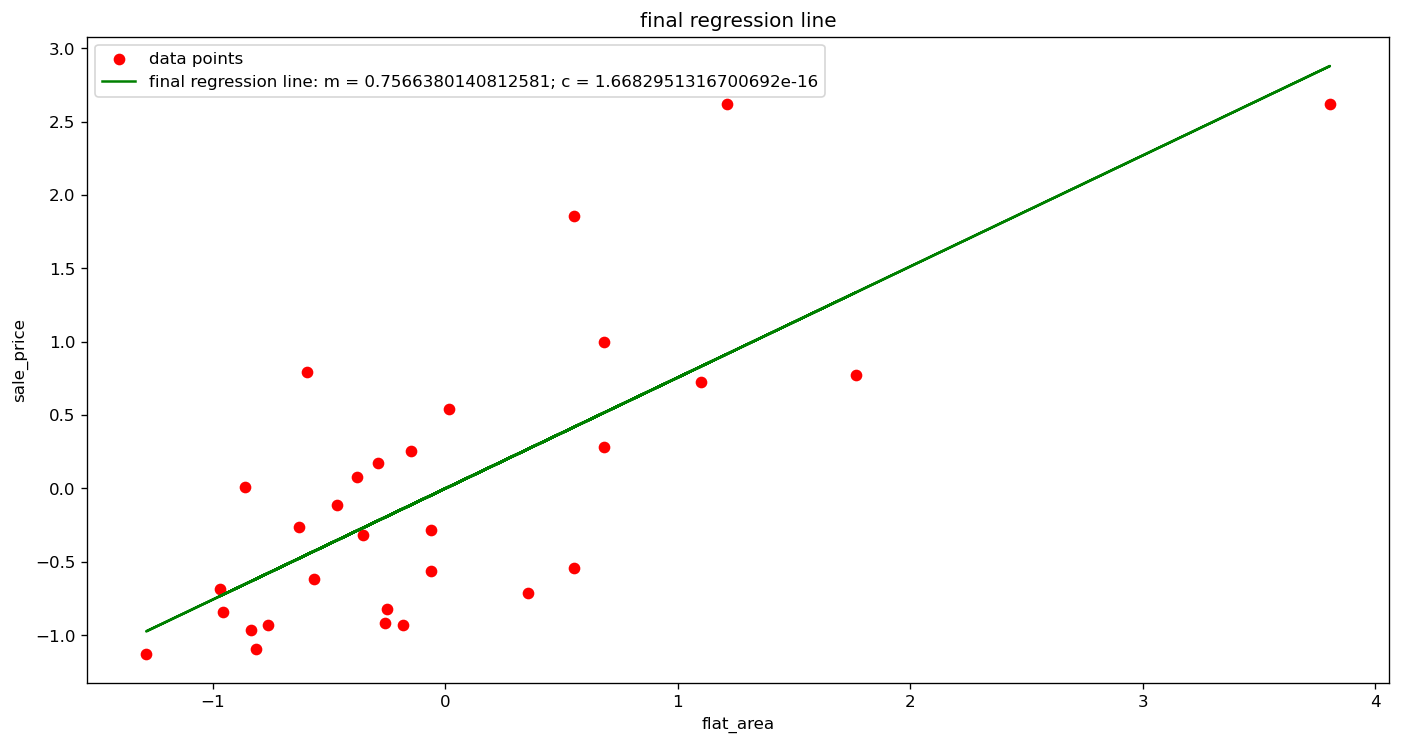

In [61]:
#scaling the dataset using the standard scaler 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

# defining and reshaping the dataset
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

# declaring parameters
max_iter =1000
cost_old = 0 
alpha = 0.01

# Step 1: initializing the values of m , c
m,c = param_init(sale_price)

# Gradient Desccent in action
for i in range(0,max_iter):

    #Step 2: generating predictions
    predictions = generate_predictions(m,c,flat_area)

    #Step 3: calculating cost
    cost_new = compute_cost(predictions ,sale_price)

    #checking if GD converged
    if abs(cost_new - cost_old) < 10**(-7):
        break

    # calculating gradients 
    Gm, Gc = gradients(predictions, sale_price, flat_area)

    #Step 4 : updating parameters m and c
    m,c = param_update(m,c,Gm,Gc,alpha)

    #display result after every 20 iterations
    if i%20 == 0:
        print('After Iteration' , i,':m =',m, ';c = ', c,' Cost = ',cost_new)

    # updating cost_old
    cost_old = cost_new

#Final Results
result(m,c , flat_area,sale_price,cost_new,predictions , i)
    